# **Telco Customer Churn**
---

### Capstone Modul 3 : Machine Learning
### Created By : Muhamad Al Junior

## **Business Problem Understanding**
---

### **Context**

**Telco Systems** adalah pemimpin global di bidang telekomunikasi, dengan pengalaman lebih dari 40 tahun dalam desain dan pengembangan solusi komunikasi jaringan berkinerja tinggi. Dengan solusi perangkat lunak dan perangkat kerasnya yang canggih, Telco Systems memberikan pendekatan revolusioner terhadap keunggulan jaringan bagi penyedia layanan, memungkinkan mereka menawarkan inovasi layanan tingkat tertinggi kepada pelanggan.

Dalam konteks ini, menjaga pelanggan yang sudah ada (retensi pelanggan) sangat penting untuk kesuksesan bisnis. Salah satu tantangan utama yang dihadapi oleh perusahaan telekomunikasi (Telco) adalah churn pelanggan, di mana pelanggan berhenti menggunakan layanan Telco dan beralih ke penyedia lain. Churn pelanggan dapat berdampak negatif pada pendapatan perusahaan karena biaya akuisisi pelanggan baru seringkali lebih tinggi daripada mempertahankan pelanggan yang sudah ada.

Dataset ini berisi berbagai fitur atau atribut yang dapat digunakan untuk memprediksi apakah seorang pelanggan akan churn atau tidak. Beberapa contoh fitur yang mungkin ada dalam dataset ini meliputi informasi seperti lamanya pelanggan berlangganan, tanggungan, biaya bulanan, dan sebagainya.

### **Problem Statement**

Telco menghadapi masalah utama dalam mengelola churn pelanggan. Meningkatnya mobilitas pelanggan dan persaingan ketat di industri ini membuat churn semakin meruncing. Oleh karena itu, **Telco memerlukan solusi efektif yang dapat membantu mengidentifikasi pelanggan yang berpotensi akan churn** dan mengambil tindakan yang tepat untuk **meminimalkan kehilangan pelanggan**. Diketahui, **biaya yang dikeluarkan lebih besar** saat perusahaan berusaha untuk mencari pelanggan baru dibanding biaya yang keluar untuk mempertahankan pelanggan yang sudah ada.

### **Goals**

**1. Mengembangkan Model Prediksi Churn**: 

Membangun model machine learning yang mampu mengidentifikasi pelanggan yang berpotensi akan churn berdasarkan data profil pelanggan yang ada.

**2. Meningkatkan Retensi Pelanggan**: 

Dengan menggunakan model ini, Telco bertujuan untuk meningkatkan retensi pelanggan dengan mengidentifikasi pelanggan yang berisiko dan menyusun strategi tindakan yang sesuai untuk mempertahankan mereka.

**3. Efisiensi Pengeluaran Perusahaan**: 

Dengan mengidentifikasi pelanggan yang cenderung churn, Telco dapat mengalokasikan sumber daya dengan lebih efisien, seperti menawarkan promosi atau peningkatan layanan kepada pelanggan yang berpotensi lebih berharga.

#### **Stakeholders**:

**Executive Management dan Marketing Teams Telco Systems** memainkan peran kunci dalam mencapai tujuan ini dengan mengawasi implementasi dan pelaksanaan model prediksi churn serta strategi retensi pelanggan yang sesuai. Mereka bertanggung jawab untuk mengambil keputusan berdasarkan data dan memastikan bahwa sumber daya perusahaan digunakan dengan efektif untuk meminimalkan churn dan memaksimalkan retensi pelanggan.

### **Analytic Approach**

Mencakup analisis eksplorasi data, pemrosesan data, pemodelan, dan evaluasi model. Data pelanggan Telco akan diolah untuk melatih model klasifikasi yang akan memprediksi apakah seorang pelanggan berpotensi churn. Setelah model dibangun, akan dilakukan evaluasi kinerja dengan menggunakan data pengujian.

### **Metric Evaluation**

Metrik evaluasi utama dalam proyek ini adalah **F2-score**, yang memberikan penekanan pada mengurangi kesalahan dalam memprediksi pelanggan yang akan churn **(false negative)**. 

Keseluruhan tujuan adalah untuk menciptakan model yang efektif dalam mengidentifikasi pelanggan yang berisiko churn dan memberikan solusi yang efisien bagi Telco untuk mengelola churn pelanggan.

## **Data Understanding**
---

Dataset Telco ini memiliki informasi berupa kolom sebanyak 11 kolom, yang nantinya digunakan dalam kebutuhan project.

| Field             | Description                                         |
|-------------------|-----------------------------------------------------|
| `Dependents`        | Apakah pelanggan memiliki tanggungan atau tidak. |
| `Tenure`            | Jumlah bulan pelanggan telah menggunakan layanan perusahaan. |
| `OnlineSecurity`    | Apakah pelanggan memiliki keamanan online atau tidak. |
| `OnlineBackup`      | Apakah pelanggan memiliki cadangan daring (online backup) atau tidak. |
| `InternetService`   | Apakah klien berlangganan layanan internet atau tidak. |
| `DeviceProtection`  | Apakah klien memiliki perlindungan perangkat atau tidak. |
| `TechSupport`       | Apakah klien memiliki dukungan teknis atau tidak. |
| `Contract`          | Jenis kontrak berdasarkan durasi. |
| `PaperlessBilling`  | Tagihan diterbitkan dalam bentuk tanpa kertas atau tidak. |
| `MonthlyCharges`    | Jumlah biaya layanan per bulan. |
| `Churn`             | Apakah pelanggan berhenti atau tidak. |

*Dataset Source* :  [Telco Customer Churn Dataset](https://drive.google.com/drive/u/1/folders/1_fR7R0srpZgnFnanbrmELgnK-xmzMAHp)

In [1]:
# Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')

# Load Data
df = pd.read_csv('data_telco_customer_churn.csv')
df.head()

,Dependents,tenure,OnlineSecurity,OnlineBackup,InternetService,DeviceProtection,TechSupport,Contract,PaperlessBilling,MonthlyCharges,Churn
0,Yes,9,No,No,DSL,Yes,Yes,Month-to-month,Yes,72.90,Yes
1,No,14,No,Yes,Fiber optic,Yes,No,Month-to-month,Yes,82.65,No
2,No,64,Yes,No,DSL,Yes,Yes,Two year,No,47.85,Yes
3,No,72,Yes,Yes,DSL,Yes,Yes,Two year,No,69.65,No
4,No,3,No internet service,No internet service,No,No internet service,No internet service,Month-to-month,Yes,23.60,No


In [2]:
# Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4930 entries, 0 to 4929
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Dependents        4930 non-null   object 
 1   tenure            4930 non-null   int64  
 2   OnlineSecurity    4930 non-null   object 
 3   OnlineBackup      4930 non-null   object 
 4   InternetService   4930 non-null   object 
 5   DeviceProtection  4930 non-null   object 
 6   TechSupport       4930 non-null   object 
 7   Contract          4930 non-null   object 
 8   PaperlessBilling  4930 non-null   object 
 9   MonthlyCharges    4930 non-null   float64
 10  Churn             4930 non-null   object 
dtypes: float64(1), int64(1), object(9)
memory usage: 423.8+ KB


Diinformasikan kembali, dataset ini memiliki **4930 data** dari **11 kolom**, 2 kolom dengan tipe data numerikal dan 9 kolom object.

## **Data Wrangling**
---

Sebelum masuk tahap analisis dan *modelling*, terlebih dahulu melakukan *deep info checking* dan cek apakah data memiliki anomali ataupun *missing value*, akan dilakukan *cleaning* jika ditemukan hal tersebut. Selanjutnya, ingin mengetahui apakah data memiliki *exteme outliers* atau tidak, jika ditemukan akan dihapus hal tersebut.

In [3]:
# Deep Info
datainfo = []
for i in df.columns:
    datainfo.append([i, df[i].dtypes,
                      df[i].isna().sum(),
                      round((((df[i].isna().sum())/(len(df)))*100),2), 
                    df[i].nunique(), 
                    df[i].sample(3).values])
pd.DataFrame(datainfo, columns = ['dataFeatures', 'dataType', 'null', 'nullPct', 'unique','uniqueSample'])

,dataFeatures,dataType,null,nullPct,unique,uniqueSample
0,Dependents,object,0,0.0,2,"[No, Yes, Yes]"
1,tenure,int64,0,0.0,73,"[40, 65, 12]"
2,OnlineSecurity,object,0,0.0,3,"[No, No internet service, No]"
3,OnlineBackup,object,0,0.0,3,"[Yes, Yes, No internet service]"
4,InternetService,object,0,0.0,3,"[Fiber optic, Fiber optic, Fiber optic]"
5,DeviceProtection,object,0,0.0,3,"[No, Yes, No]"
6,TechSupport,object,0,0.0,3,"[Yes, No, No]"
7,Contract,object,0,0.0,3,"[Month-to-month, Two year, Month-to-month]"
8,PaperlessBilling,object,0,0.0,2,"[Yes, No, No]"
9,MonthlyCharges,float64,0,0.0,1422,"[54.4, 80.7, 44.6]"


In [4]:
# Missing Value
df.isna().sum()

Dependents          0
tenure              0
OnlineSecurity      0
OnlineBackup        0
InternetService     0
DeviceProtection    0
TechSupport         0
Contract            0
PaperlessBilling    0
MonthlyCharges      0
Churn               0
dtype: int64

Ditemukan bahwa data tidak memiliki *missing value*.

In [5]:
df.describe()

,tenure,MonthlyCharges
count,4930.000000,4930.000000
mean,32.401217,64.883032
std,24.501193,29.923960
min,0.000000,18.800000
25%,9.000000,37.050000
50%,29.000000,70.350000
75%,55.000000,89.850000
max,72.000000,118.650000


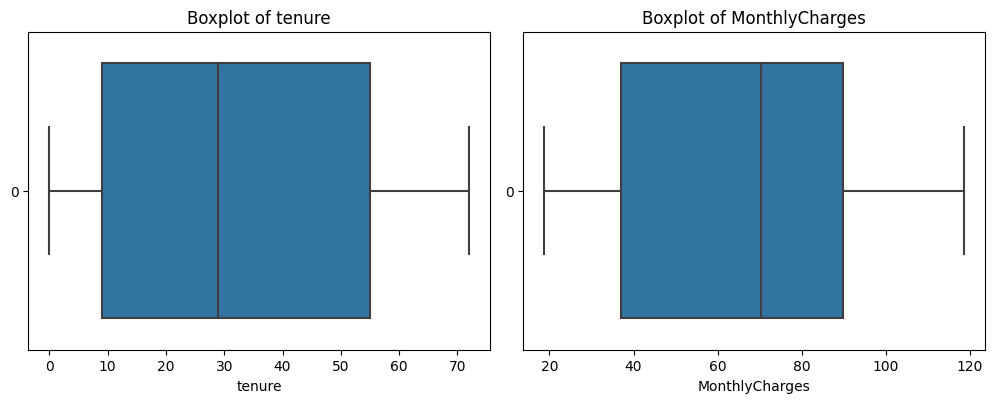

In [6]:
numerical_cols = df.drop('Churn', axis=1).select_dtypes(include=np.number).columns.tolist()
#Plotting boxplot for numerical values 
plt.figure(figsize=(15, 15))
for i, column in enumerate(numerical_cols, 1):
    plt.subplot(4, 3, i)
    sns.boxplot(data=df[column], orient='horizontal')
    plt.title(f'Boxplot of {column}')
    plt.xlabel(column)
    
plt.tight_layout()
plt.show()

Tidak ditemukannya *outliers* atau bahkan *extreme outliers*. Dengan tidak ditemukannya *missing value* dan *outliers*, artinya tidap perlu melakukan pembersihan terhadap data dan data telah siap untuk dilakukan ke tahap berikutnya.

## **Exploratory Data Analysis**
---

Ditahap ini, ingin mengetahui atau menemukan hal-hal yang sekiranya mencakup tujuan dalam identifikasi pola pelanggan Telco terhadap *churn*.

In [7]:
# Churned Customers
df['Churn'].value_counts().reset_index()

,Churn,count
0,No,3614
1,Yes,1316


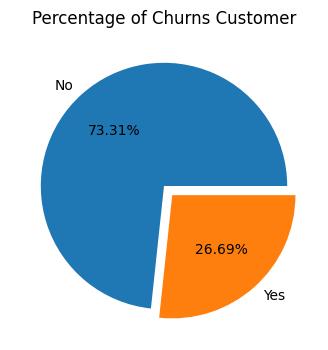

In [8]:
# Percentage of Churn Labels
churn_label_count = df['Churn'].value_counts()
fig = plt.figure(figsize=(7, 4), dpi=100)
plt.pie(
    churn_label_count,
    autopct="%.2f%%",
    labels=churn_label_count.index,
    explode=[0, 0.1],
)
plt.title("Percentage of Churns Customer")
plt.show()

Telco telah kehilangan **1316 pelanggan** dengan persentase kehilangan pelanggan sebesar **26,69%**.

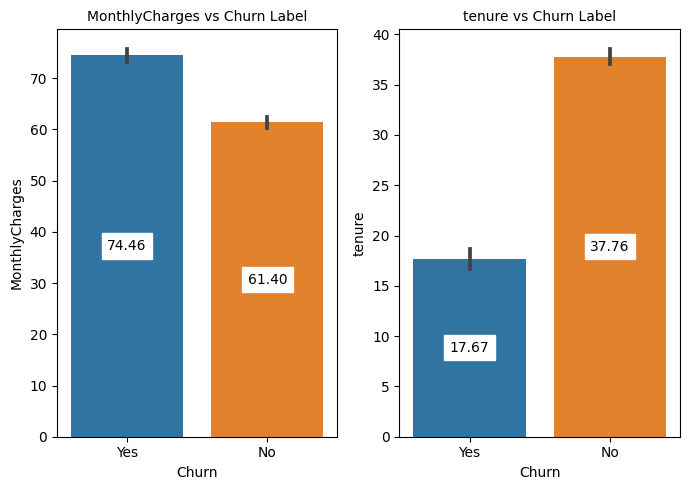

In [9]:
# Plot for Numeric Columns
numeric_columns = df.select_dtypes(include=["int64", "float64"]).columns

columns_to_exclude = ["Dependents", "OnlineSecurity", "OnlineBackup", "InternetService", "DeviceProtection", "TechSupport", "Contract", "Churn"]

numeric_columns = numeric_columns.difference(columns_to_exclude)

fig, axes = plt.subplots(1, 2, figsize=(7, 5))
axes = axes.flatten()

for i, column in enumerate(numeric_columns):
    ax = axes[i]
    sns.barplot(data=df, x="Churn", y=column, ax=ax, estimator=np.mean)
    ax.set_title(f"{column} vs Churn Label", fontsize=10)

    for k in ax.containers:
        ax.bar_label(
            k, fontsize=10, label_type="center", backgroundcolor="w", fmt="%.2f"
        )
plt.tight_layout()
plt.show()

Dari grafik diatas, ditemukan bahwa pelanggan dengan rata-rata biaya layanan per bulan sebesar **74,46** dan pelanggan dengan rata-rata penggunaan layanan selama **17,67** bulan melakukan **Churn**.

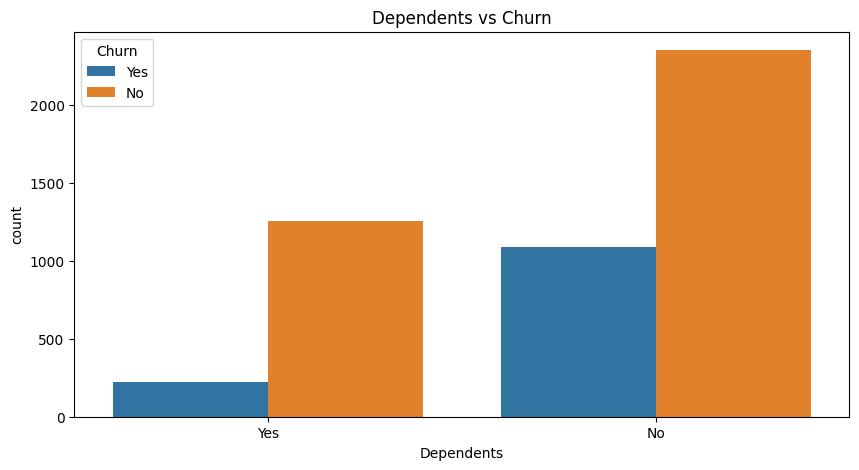

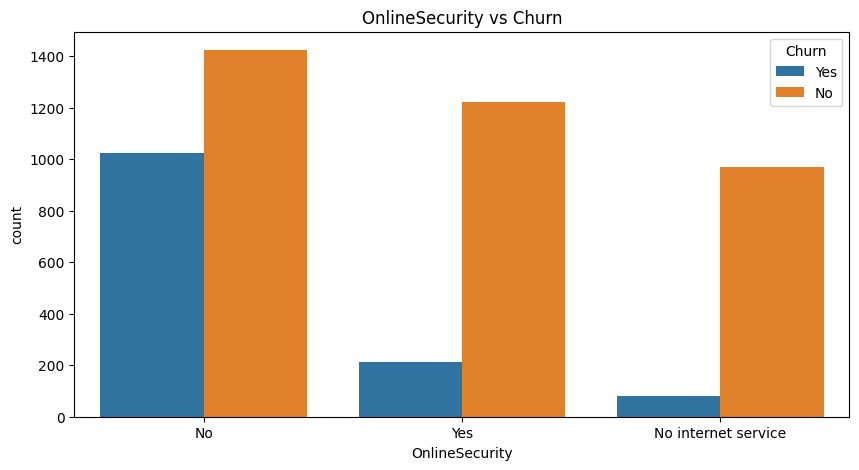

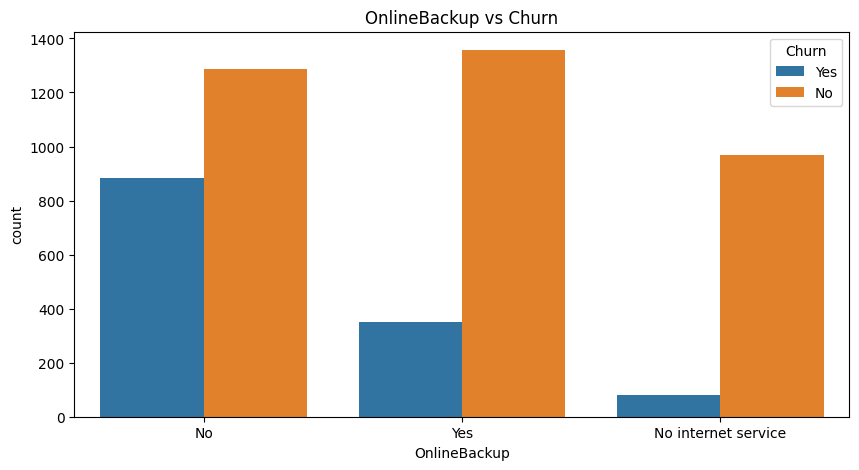

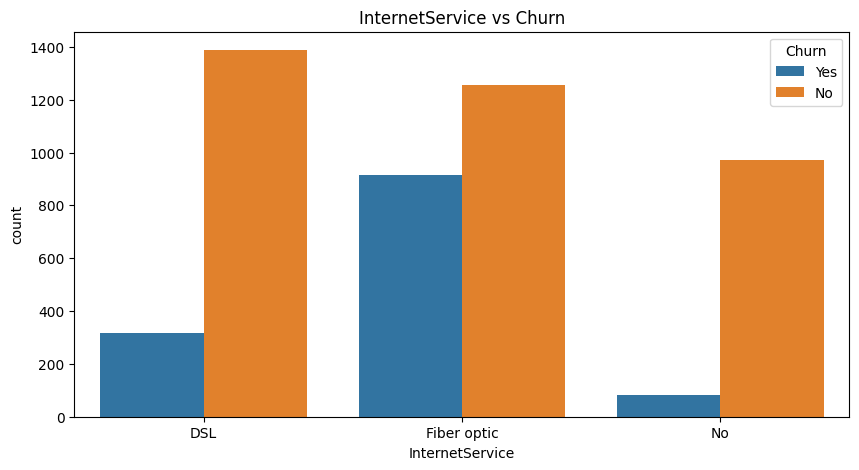

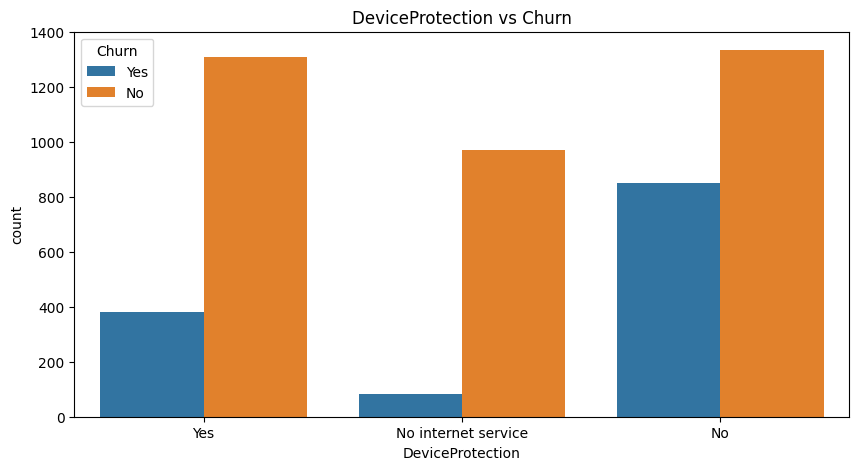

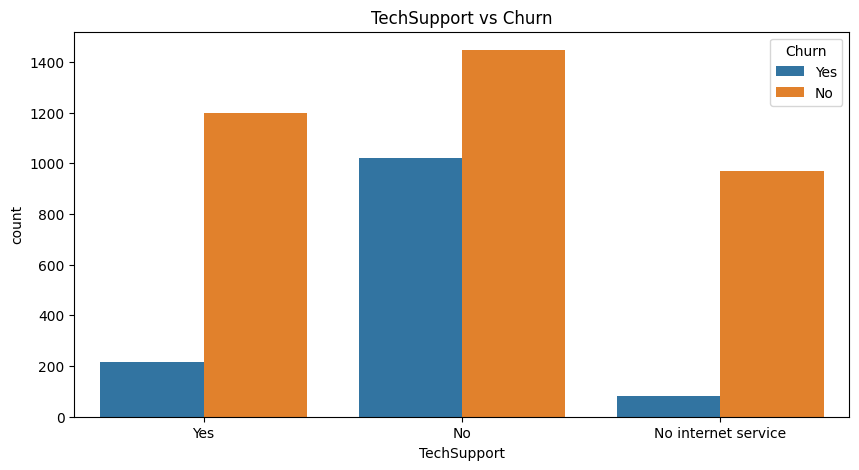

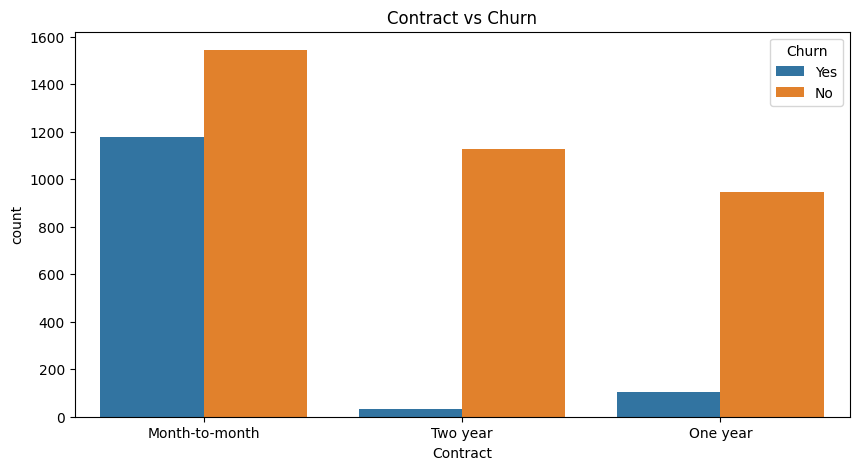

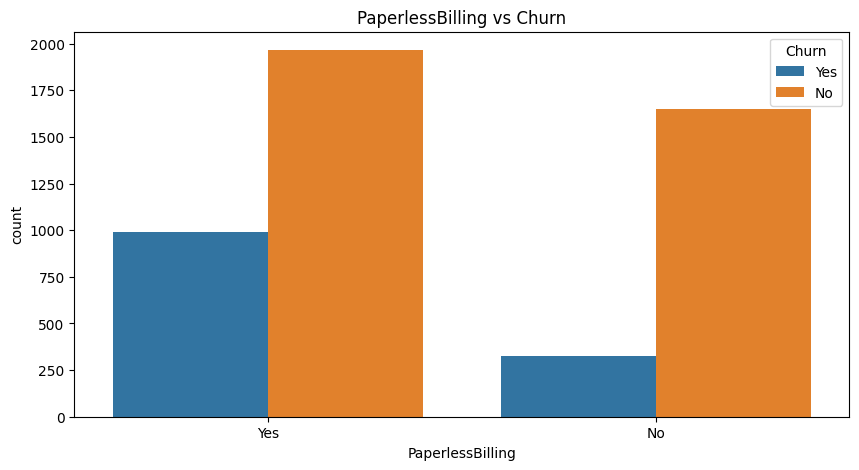

In [10]:
object_columns = df.select_dtypes(include=['object'])

for col in object_columns.columns:
    if col != 'Churn':
        plt.figure(figsize=(10, 5))
        sns.countplot(data=df, x=col, hue='Churn')
        plt.title(f'{col} vs Churn')
        plt.show()

Dari grafik-grafik diatas yang berupa perbandingan kolom-kolom(selain churn) terhadap `Churn`, diketahui bahwa perilaku atau pola pelanggan yang melakukan *churn* lebih kecil atau lebih sedikit dibanding pelanggan yang tidak *churn*. Tetapi, dari grafik diatas belum dapat disimpulkan tentang *pattern* pelanggan yang *churn* maupun tidak.

## **Machine Learning Modelling**
---

Selanjutnya, akan dilakukan *Modelling*. Pertama terlebih dahulu dilakukan persiapan data untuk meninjau kembali informasi data yang bisa diimplementasikan ke model.

### **Data Preprocessing**

Perlu diketahui kolom apa saja yang digunakan untuk model dimana kolom-kolom harus ada keterkaitan terhadap target yaitu *churn*. Untuk mengetahui itu, diperlukan uji **Chi Square**. 

In [11]:
# Chi Square
from scipy.stats.contingency import chi2_contingency

def chi_square_test(df):

    columns = ['Dependents', 'tenure', 'OnlineSecurity', 'OnlineBackup',
       'InternetService', 'DeviceProtection', 'TechSupport', 'Contract',
       'MonthlyCharges', 'PaperlessBilling']
    p_value = []
    dofs = []
    chi_square = []
    for column in columns:
        crosstab = pd.crosstab(
            index=df[column], columns=df['Churn']
        )
        chi_value, p, dof, ev = chi2_contingency(crosstab)
        chi_square.append(chi_value)
        dofs.append(dof)
        p_value.append(p)

    return pd.DataFrame(
        {
            "column": columns,
            "test_statistic": np.round(chi_square),
            "degree_of_freedom": dof,
            "p_value": np.round(p_value, 2),
        }
    )

chi_table = chi_square_test(df)
chi_table["Decision"] = np.where(
    chi_table.p_value < 0.05, "significant", "not significant"
)
chi_table

,column,test_statistic,degree_of_freedom,p_value,Decision
0,Dependents,143.0,1,0.0,significant
1,tenure,791.0,1,0.0,significant
2,OnlineSecurity,581.0,1,0.0,significant
3,OnlineBackup,445.0,1,0.0,significant
4,InternetService,515.0,1,0.0,significant
5,DeviceProtection,374.0,1,0.0,significant
6,TechSupport,558.0,1,0.0,significant
7,Contract,870.0,1,0.0,significant
8,MonthlyCharges,1827.0,1,0.0,significant
9,PaperlessBilling,175.0,1,0.0,significant


Dari hasil uji Chi Square diatas, ternyata **semua kolom memiliki keterkaitan yang signifikan** terhadap target.

In [12]:
# Replace Churn Value as 0 (No) and 1 (Yes) & Quality Class Proportion
df['Churn'].replace({'No': 0, 'Yes': 1}, inplace=True)
df['Churn'].value_counts()/len(df)*100

Churn
0    73.306288
1    26.693712
Name: count, dtype: float64

Nilai *Yes* dan *No* di kolom `Churn` perlu di ubah dalam bentuk 1 dan 0, dimana 1 di identifikasi sebagai pelanggan yang melakukan *churn* dan 0 untuk pelanggan yang tidak melakukan. Lalu, dilihat persentase nilainya, apakah data *balance* atau *imbalance*. Ternyata ditemukan bahwa datanya **imbalance**, maka nantinya akan di *threat* dengan metode imbalance terhadap model.

### **Data Preparation**

Data preparation adalah tahap yang datang setelah data preprocessing. Ini melibatkan penyiapan data yang sudah bersih dan terstruktur untuk tujuan analisis atau pemodelan yang spesifik. Tujuannya adalah untuk mengorganisasi data dalam format yang sesuai dengan kebutuhan analisis atau pemodelan yang akan dilakukan. Misalnya, pengambilan subset data, penggabungan dataset, transformasi fitur, dan sebagainya. Data preparation melibatkan tugas seperti pemilihan fitur (feature selection) dan pemisahan data menjadi data train dan data test.

#### *Transformer Schema*

*Features* atau kolom-kolom yang berupa object atau kategorikal yaitu `Dependents, OnlineSecurity, OnlineBackup, DeviceProtection, InternetService, TechSupport, Contract, PaperlessBilling` akan di *encode* (diubah ke bentuk angka). Encode yang digunakan adalah **One Hot Encoder**.

Untuk *features* yang berupa numerikal yaitu `tenure` dan `MonthlyCharges` akan dinormalisasi atau *scaling*. *Scaler* yang digunakan yaitu **Robust Scaler**.

In [13]:
# Transformer Schema
# Encoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

# Scaler
from sklearn.preprocessing import RobustScaler

transform = ColumnTransformer([
    ('One Hot Encoder', OneHotEncoder(drop='first'), ['Dependents', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'InternetService', 'TechSupport', 'Contract', 'PaperlessBilling']),
    ('Scaler', RobustScaler(), ['tenure', 'MonthlyCharges'])
])

transform

ColumnTransformer(transformers=[('One Hot Encoder', OneHotEncoder(drop='first'),
                                 ['Dependents', 'OnlineSecurity',
                                  'OnlineBackup', 'DeviceProtection',
                                  'InternetService', 'TechSupport', 'Contract',
                                  'PaperlessBilling']),
                                ('Scaler', RobustScaler(),
                                 ['tenure', 'MonthlyCharges'])])

In [30]:
#Check Transformer
df_encoded = pd.DataFrame(transform.fit_transform(df))
df_encoded

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,-0.434783,0.048295
1,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,-0.326087,0.232955
2,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.760870,-0.426136
3,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.934783,-0.013258
4,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,-0.565217,-0.885417
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4925,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,-0.304348,0.626894
4926,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,-0.413043,0.392992
4927,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.630435,-0.939394
4928,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,-0.608696,-0.011364


#### *Train Test Split*

Di tahap ini, data akan pisah menjadi dua, **data train** dan **data test**. Untuk proporsinya, data dipisah **80%** untuk data test dan **20%** untuk data test.

In [31]:
# Train test split
from sklearn.model_selection import train_test_split
X = df.drop('Churn', axis=1)  # All cols except default as ind var (x)
y = df['Churn']               # default col as target (y) 

Xtrain, Xtest, ytrain, ytest = train_test_split(
    X,
    y,
    test_size= 0.2,    # Test Data Size as 20% 
    random_state=2023,   # Random seed
    stratify=y         # Proportion between train & test, same propotion as y 
)

In [32]:
# Check for data shape
Xtrain.shape, Xtest.shape, ytrain.shape, ytest.shape

((3944, 10), (986, 10), (3944,), (986,))

#### *Model Selection, Listing, and Benchmarking*

In [33]:
# Evaluation Metrics
from sklearn.metrics import classification_report, make_scorer, fbeta_score
from sklearn.model_selection import cross_val_score, StratifiedKFold

# Base Models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier, StackingClassifier
from sklearn.svm import SVC

# Initiate Base Models
logreg = LogisticRegression()
knn = KNeighborsClassifier()
dtc = DecisionTreeClassifier()
svc = SVC()


In [34]:
# Import Ensemble Models
from sklearn.ensemble import VotingClassifier, StackingClassifier

# Initiate Ensemble Models - Various Types
vc = VotingClassifier(estimators=[
    ('dtc', DecisionTreeClassifier()),
    ('knn', KNeighborsClassifier()),
    ('lr', logreg)
], voting='hard')

sc = StackingClassifier(estimators=[ 
    ('dtc', dtc),
    ('knn', knn),
    ('lr', logreg)
], final_estimator=dtc)

In [35]:
# Ensemble Models (Bagging)
from sklearn.ensemble import RandomForestClassifier

# Ensemble Models (Boosting)
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

# Bagging Classifier
rf = RandomForestClassifier(random_state=2023)

# Boosting Classifier
ada = AdaBoostClassifier(random_state=2023)
gbc = GradientBoostingClassifier(random_state=2023)
xgb = XGBClassifier(random_state=2023)

In [36]:
# Loop through models with imbalance data handling
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler, NearMiss
from sklearn.metrics import make_scorer, fbeta_score
from sklearn.model_selection import cross_val_score

f2_scoresheet = make_scorer(fbeta_score, beta=2)

ROS = RandomOverSampler(random_state=2023)
RUS = RandomUnderSampler(random_state=2023)  
NM = NearMiss()

# Define models and resampling
model_list = [dtc, knn, logreg, svc, vc, sc, rf, ada, gbc, xgb]
resample = [ROS, RUS, NM]

# Model names for dataframe
model_names = ['DT', 'KNN', 'logreg', 'SVC', 'VC', 'SC', 'RF', 'ADA', 'GBC', 'XGB']
resample_names = ['ROS', 'RUS', 'NM']

# Model selection score list
model_score = []
f2_score = []
std = []

# Loop through the model list
for i, model in enumerate(model_list):
    for j, resampler in enumerate(resample):
        model_pipe = Pipeline([
            ('prep', transform),
            ('imba', resampler),
            ('algo', model)
        ])

        pipecv = cross_val_score(model_pipe, Xtrain, ytrain, cv=5, scoring=f2_scoresheet)
        
        # Append the model scores to the lists
        model_score.append(f"{model_names[i]}-{resample_names[j]}")
        f2_score.append(pipecv.mean())
        std.append(pipecv.std())

# Create Dataframe
scoresheet = pd.DataFrame({
    'Model': model_score,
    'Mean F2 Score': f2_score,
    'Std': std
}).sort_values(by='Mean F2 Score', ascending=False)

# Display the resulting Dataframe
scoresheet


,Model,Mean F2 Score,Std
21,ADA-ROS,0.723527,0.014858
10,SVC-RUS,0.723125,0.009883
25,GBC-RUS,0.722955,0.019545
7,logreg-RUS,0.716635,0.011193
22,ADA-RUS,0.712838,0.016085
6,logreg-ROS,0.711963,0.009183
9,SVC-ROS,0.710649,0.020348
24,GBC-ROS,0.703259,0.003626
13,VC-RUS,0.702470,0.013501
4,KNN-RUS,0.689424,0.021735


**Best Model**: Adaptive Boost (**ADA**) dengan RandomOverSampler (**ROS**)

#### *Mengaplikasikan 3 Model Teratas ke Data Test*

3 model teratas akan diaplikasikan ke data test, lalu akan dibandingkan dan melihat bagaimana scoring dari model-model tersebut. Selanjutnya akan dilakukan *hyperparameter tuning* untuk tiap model tersebut, lalu akan dibandingkan kembali scoring yang dihasilkan.

#### **Best Model 1 : ADA-ROS**

- Model : ADA Boost
- Resampling : Random Over Sampler

In [37]:
# Create a pipeline with preprocessing, resampling, and Adaboost
pipe_ada = Pipeline([
    ('prep', transform),
    ('imba', ROS),
    ('algo', ada)
])

pipe_ada

Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('One Hot Encoder',
                                                  OneHotEncoder(drop='first'),
                                                  ['Dependents',
                                                   'OnlineSecurity',
                                                   'OnlineBackup',
                                                   'DeviceProtection',
                                                   'InternetService',
                                                   'TechSupport', 'Contract',
                                                   'PaperlessBilling']),
                                                 ('Scaler', RobustScaler(),
                                                  ['tenure',
                                                   'MonthlyCharges'])])),
                ('imba', RandomOverSampler(random_state=2023)),
                ('algo', AdaBoostClassifier(random_state=2023))])

In [38]:
# Fit Based Best Model 1 Pipeline to Train & Test Set
pipe_ada.fit(Xtrain, ytrain)
print(f'F2 Score with ADA-ROS(Default): {fbeta_score(ytest, pipe_ada.predict(Xtest), beta=2)}')

F2 Score with ADA-ROS(Default): 0.6818181818181819


##### **Hyperparameter Tuning**

References: [Using GridSearchCV with AdaBoost and DecisionTreeClassifier](https://stackoverflow.com/questions/32210569/using-gridsearchcv-with-adaboost-and-decisiontreeclassifier)

In [39]:
#  ADA Boost Hyperparameter Tuning

#Import GridSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

#Import kfold
from sklearn.model_selection import StratifiedKFold

kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=2023)

#setup the parameter grid for ADA
ada_space = {
    'algo__n_estimators': np.arange(50, 1001, 50),
    'algo__learning_rate': [(0.97 + x / 100) for x in range(0, 8)],
    'algo__algorithm': ['SAMME', 'SAMME.R']
}

# Initialize GridSearchCV
ada_grid = GridSearchCV(pipe_ada, param_grid=ada_space, cv=kfold, scoring=f2_scoresheet, n_jobs=-1)
ada_grid

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=2023, shuffle=True),
             estimator=Pipeline(steps=[('prep',
                                        ColumnTransformer(transformers=[('One '
                                                                         'Hot '
                                                                         'Encoder',
                                                                         OneHotEncoder(drop='first'),
                                                                         ['Dependents',
                                                                          'OnlineSecurity',
                                                                          'OnlineBackup',
                                                                          'DeviceProtection',
                                                                          'InternetService',
                                                                          'TechSupport',
                                                                          'Contract',
                                                                          'PaperlessBilling']),
                                                                        ('Scaler',
                                                                         RobustScaler(),
                                                                         ['tenu...
                                        RandomOverSampler(random_state=2023)),
                                       ('algo',
                                        AdaBoostClassifier(random_state=2023))]),
             n_jobs=-1,
             param_grid={'algo__algorithm': ['SAMME', 'SAMME.R'],
                         'algo__learning_rate': [0.97, 0.98, 0.99, 1.0, 1.01,
                                                 1.02, 1.03, 1.04],
                         'algo__n_estimators': array([  50,  100,  150,  200,  250,  300,  350,  400,  450,  500,  550,
        600,  650,  700,  750,  800,  850,  900,  950, 1000])},
             scoring=make_scorer(fbeta_score, beta=2))

In [40]:
ada_grid.fit(Xtrain, ytrain)

#Check the best parameters
best_params = ada_grid.best_params_
print("Best Hyperparameters:", best_params)

Best Hyperparameters: {'algo__algorithm': 'SAMME.R', 'algo__learning_rate': 1.02, 'algo__n_estimators': 50}


In [41]:
# Evaluate the model on the test set

# Fit model on train data
ada_grid.best_estimator_.fit(Xtrain, ytrain)

# Create ADA Prediction
adapred = ada_grid.predict(Xtest)

In [42]:
print(f'F2 Score with ADA-ROS(Tuned, Test Set): {fbeta_score(ytest, adapred, beta=2)}')

F2 Score with ADA-ROS(Tuned, Test Set): 0.6822953114065781


#### **Best Model 2 : SVC-RUS**
- Model      : Super Vector Classification
- Resampling : Random Under Sampler

In [43]:
# Create a pipeline with preprocessing, resampling, and Adaboost
pipe_svc = Pipeline([
    ('prep', transform),
    ('imba', RUS),
    ('algo', svc)
])

pipe_svc

Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('One Hot Encoder',
                                                  OneHotEncoder(drop='first'),
                                                  ['Dependents',
                                                   'OnlineSecurity',
                                                   'OnlineBackup',
                                                   'DeviceProtection',
                                                   'InternetService',
                                                   'TechSupport', 'Contract',
                                                   'PaperlessBilling']),
                                                 ('Scaler', RobustScaler(),
                                                  ['tenure',
                                                   'MonthlyCharges'])])),
                ('imba', RandomUnderSampler(random_state=2023)),
                ('algo', SVC())])

In [44]:
# Fit Based Best Model 2 Pipeline to Train & Test Set
pipe_svc.fit(Xtrain, ytrain)
print(f'F2 Score with SVC-RUS(Default): {fbeta_score(ytest, pipe_svc.predict(Xtest), beta=2)}')

F2 Score with SVC-RUS(Default): 0.6808659217877094


##### **Hyperparameter Tuning**

References: [SVM Hyperparamter tunning using GridSearchCV](https://stackoverflow.com/questions/68705237/svm-hyperparamter-tunning-using-gridsearchcv)

In [45]:
#  SVC Hyperparameter Tuning

# Define the parameter grid for SVC
svc_space = {
    'algo__C': [0.1, 1, 10, 100],
    'algo__kernel': ['linear', 'poly', 'rbf'],
    'algo__degree': [2, 3, 4],
    'algo__gamma': ['scale', 'auto', 0.1, 1],
    'algo__class_weight': [None, 'balanced']
}

# Initialize GridSearchCV
svc_grid = GridSearchCV(pipe_svc, param_grid=svc_space, cv=kfold, scoring=f2_scoresheet, n_jobs=-1)

# Perform grid search
svc_grid.fit(Xtrain, ytrain)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=2023, shuffle=True),
             estimator=Pipeline(steps=[('prep',
                                        ColumnTransformer(transformers=[('One '
                                                                         'Hot '
                                                                         'Encoder',
                                                                         OneHotEncoder(drop='first'),
                                                                         ['Dependents',
                                                                          'OnlineSecurity',
                                                                          'OnlineBackup',
                                                                          'DeviceProtection',
                                                                          'InternetService',
                                                                          'TechSupport',
                                                                          'Contract',
                                                                          'PaperlessBilling']),
                                                                        ('Scaler',
                                                                         RobustScaler(),
                                                                         ['tenure',
                                                                          'MonthlyCharges'])])),
                                       ('imba',
                                        RandomUnderSampler(random_state=2023)),
                                       ('algo', SVC())]),
             n_jobs=-1,
             param_grid={'algo__C': [0.1, 1, 10, 100],
                         'algo__class_weight': [None, 'balanced'],
                         'algo__degree': [2, 3, 4],
                         'algo__gamma': ['scale', 'auto', 0.1, 1],
                         'algo__kernel': ['linear', 'poly', 'rbf']},
             scoring=make_scorer(fbeta_score, beta=2))

In [46]:
#Check the best parameters
svc_best_params = svc_grid.best_params_
print("Best Hyperparameters:", svc_best_params)

Best Hyperparameters: {'algo__C': 0.1, 'algo__class_weight': None, 'algo__degree': 2, 'algo__gamma': 'scale', 'algo__kernel': 'linear'}


In [47]:
# Evaluate the model on the test set

#Fit model on train data
svc_grid.best_estimator_.fit(Xtrain, ytrain)

#Create prediction
svcpred = svc_grid.predict(Xtest)

In [48]:
print(f'F2 Score with SVC-RUS(Tuned): {fbeta_score(ytest, svcpred, beta=2)}')

F2 Score with SVC-RUS(Tuned): 0.7152361942781105


#### **Best Model 3 : GBC-RUS**
- Model      : Gradient Boosting Classifier
- Resampling : Random Under Sampler

In [49]:
# Create a pipeline with preprocessing, resampling, and Adaboost
pipe_gbc = Pipeline([
    ('prep', transform),
    ('imba', RUS),
    ('algo', gbc)
])

pipe_gbc

Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('One Hot Encoder',
                                                  OneHotEncoder(drop='first'),
                                                  ['Dependents',
                                                   'OnlineSecurity',
                                                   'OnlineBackup',
                                                   'DeviceProtection',
                                                   'InternetService',
                                                   'TechSupport', 'Contract',
                                                   'PaperlessBilling']),
                                                 ('Scaler', RobustScaler(),
                                                  ['tenure',
                                                   'MonthlyCharges'])])),
                ('imba', RandomUnderSampler(random_state=2023)),
                ('algo', GradientBoostingClassifier(random_state=2023))])

In [50]:
# Fit Based Best Model 2 Pipeline to Train & Test Set
pipe_gbc.fit(Xtrain, ytrain)
print(f'F2 Score with GBC-RUS(Default): {fbeta_score(ytest, pipe_gbc.predict(Xtest), beta=2)}')

F2 Score with GBC-RUS(Default): 0.6752974107767671


##### **Hyperparameter Tuning**

References: [Parameter Tuning using gridsearchcv for gradientboosting classifier in python](https://stackoverflow.com/questions/58781601/parameter-tuning-using-gridsearchcv-for-gradientboosting-classifier-in-python)

In [51]:
#  GBC Hyperparameter Tuning

# Define the parameter grid for gbc
gbc_space = {
    'algo__loss': ["deviance"],
    'algo__learning_rate': [0.01, 0.025, 0.05, 0.075, 0.1, 0.15, 0.2],
    'algo__min_samples_split': np.linspace(0.1, 0.5, 12),
    'algo__min_samples_leaf': np.linspace(0.1, 0.5, 12),
    'algo__max_depth':[3,5,8],
    'algo__max_features':["log2","sqrt"],
    'algo__criterion':["friedman_mse",  "mae"],
    'algo__subsample':[0.5, 0.618, 0.8, 0.85, 0.9, 0.95, 1.0],
    'algo__n_estimators':[10]
}

# Initialize GridSearchCV
gbc_grid = GridSearchCV(pipe_gbc, param_grid=gbc_space, cv=kfold, scoring=f2_scoresheet, n_jobs=-1)

# Perform grid search
gbc_grid.fit(Xtrain, ytrain)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=2023, shuffle=True),
             estimator=Pipeline(steps=[('prep',
                                        ColumnTransformer(transformers=[('One '
                                                                         'Hot '
                                                                         'Encoder',
                                                                         OneHotEncoder(drop='first'),
                                                                         ['Dependents',
                                                                          'OnlineSecurity',
                                                                          'OnlineBackup',
                                                                          'DeviceProtection',
                                                                          'InternetService',
                                                                          'TechSupport',
                                                                          'Contract',
                                                                          'PaperlessBilling']),
                                                                        ('Scaler',
                                                                         RobustScaler(),
                                                                         ['tenu...
                         'algo__min_samples_leaf': array([0.1       , 0.13636364, 0.17272727, 0.20909091, 0.24545455,
       0.28181818, 0.31818182, 0.35454545, 0.39090909, 0.42727273,
       0.46363636, 0.5       ]),
                         'algo__min_samples_split': array([0.1       , 0.13636364, 0.17272727, 0.20909091, 0.24545455,
       0.28181818, 0.31818182, 0.35454545, 0.39090909, 0.42727273,
       0.46363636, 0.5       ]),
                         'algo__n_estimators': [10],
                         'algo__subsample': [0.5, 0.618, 0.8, 0.85, 0.9, 0.95,
                                             1.0]},
             scoring=make_scorer(fbeta_score, beta=2))

In [52]:
#Check the best parameters
gbc_best_params = gbc_grid.best_params_
print("Best Hyperparameters:", gbc_best_params)

Best Hyperparameters: {'algo__criterion': 'friedman_mse', 'algo__learning_rate': 0.01, 'algo__loss': 'deviance', 'algo__max_depth': 3, 'algo__max_features': 'log2', 'algo__min_samples_leaf': 0.1, 'algo__min_samples_split': 0.5, 'algo__n_estimators': 10, 'algo__subsample': 0.618}


In [53]:
# Evaluate the model on the test set

#Fit model on train data
gbc_grid.best_estimator_.fit(Xtrain, ytrain)

#Create prediction
gbcpred = gbc_grid.predict(Xtest)

In [54]:
print(f'F2 Score with GBC-RUS(Tuned): {fbeta_score(ytest, gbcpred, beta=2)}')

F2 Score with GBC-RUS(Tuned): 0.6738544474393531


### Hasil Benchmarking Model pada Data Train

Dalam tahap benchmarking pada data pelatihan (train), tiga model klasifikasi yang telah dievaluasi adalah ADA-ROS, SVC-RUS, dan GBC-RUS. Hasil dari evaluasi model pada data train adalah sebagai berikut:

1. **ADA-ROS** memiliki Mean F2 Score sebesar 0.723527 dengan standar deviasi sekitar 0.014858.
2. **SVC-RUS** memiliki Mean F2 Score sebesar 0.723125 dengan standar deviasi sekitar 0.009883.
3. **GBC-RUS** memiliki Mean F2 Score sebesar 0.722955 dengan standar deviasi sekitar 0.019545.

### Evaluasi Tiga Model Terbaik pada Data Test

Kemudian, tiga model terbaik dipilih dan dievaluasi pada data uji (test) untuk mengukur kinerja mereka. Hasil evaluasi pada data test adalah sebagai berikut:

1. **F2 Score dengan ADA-ROS (Default):** 68.18%
2. **F2 Score dengan SVC-RUS (Default):** 68.09%
3. **F2 Score dengan GBC-RUS (Default):** 67.53%

### Hasil Parameter Tuning

Selanjutnya, parameter dari tiga model terbaik telah disesuaikan (tuned) untuk meningkatkan performa. Hasil evaluasi setelah parameter tuning adalah sebagai berikut:

1. **F2 Score dengan ADA-ROS (Tuned):** 68.23%
2. **F2 Score dengan SVC-RUS (Tuned):** 71.52%
3. **F2 Score dengan GBC-RUS (Tuned):** 67.39%

### Final Model

Berdasarkan hasil evaluasi pada data train, tiga model klasifikasi yang telah diuji (ADA-ROS, SVC-RUS, GBC-RUS), dengan ADA-ROS menonjol sebagai model dengan Mean F2 Score tertinggi.

Berdasarkan hasil evaluasi yang Anda berikan, **model yang diambil untuk final adalah SVC-RUS yang sudah dituning**. SVC-RUS setelah tuning menghasilkan F2 Score tertinggi (**71.52%**) pada data uji, yang menunjukkan kinerja yang lebih baik dalam mengidentifikasi pelanggan yang berpotensi churn dibandingkan dengan model lainnya.

Sebagai tambahan, tuning parameter pada model dapat meningkatkan kemampuan model dalam menyesuaikan diri dengan data dan menghasilkan hasil yang lebih baik. Oleh karena itu, model SVC-RUS yang telah disesuaikan dengan baik direkomendasikan sebagai final model untuk mengidentifikasi pelanggan yang berpotensi churn dalam proyek ini.

### FYI
### SVC-RUS (Support Vector Classifier with Random Undersampling)

SVC-RUS adalah model klasifikasi yang menggabungkan dua konsep kunci: Support Vector Classifier (SVC) dan Random Undersampling. Ini adalah pendekatan yang digunakan untuk mengatasi masalah ketidakseimbangan kelas dalam data, yang sering terjadi dalam tugas klasifikasi, termasuk dalam kasus identifikasi churn pelanggan.

##### 1. Support Vector Classifier (SVC)

SVC adalah model klasifikasi yang berbasis pada konsep vektor pendukung (support vectors) dalam ruang fitur. Tujuannya adalah untuk menemukan hyperplane yang memisahkan dua kelas data dengan margin terbesar. SVC sering digunakan dalam tugas klasifikasi biner dan dapat menangani data yang tidak linear dengan menggunakan fungsi kernel.

##### 2. Random Undersampling

Random Undersampling adalah teknik yang digunakan untuk mengatasi ketidakseimbangan kelas dalam data. Dalam kasus identifikasi churn pelanggan, sering kali terdapat lebih banyak pelanggan yang tidak churn daripada yang churn. Dengan Random Undersampling, kita secara acak mengurangi jumlah sampel dari kelas mayoritas (pelanggan yang tidak churn) sehingga seimbang dengan jumlah sampel kelas minoritas (pelanggan yang churn). Tujuannya adalah untuk mencegah model terlalu didominasi oleh kelas mayoritas dan meningkatkan kemampuan model dalam mengidentifikasi kelas minoritas yang penting.

##### 3. SVC-RUS: Kombinasi SVC dan Random Undersampling

Dalam SVC-RUS, kita menerapkan SVC pada data yang telah diundersample menggunakan Random Undersampling. Ini berarti kita melatih model SVC pada dataset yang telah diseimbangkan, dengan jumlah sampel dari kedua kelas yang mendekati kesetaraan. Hal ini memungkinkan model untuk mengambil keputusan yang lebih seimbang antara kelas-kelas yang berbeda dan meningkatkan kemampuan dalam mengidentifikasi pelanggan yang berpotensi churn.

SVC-RUS dapat dioptimalkan dengan tuning parameter SVC dan dengan mengatur proporsi undersampling untuk mencapai keseimbangan yang sesuai antara kelas. Hasil evaluasi menunjukkan bahwa model SVC-RUS yang telah disesuaikan dengan baik dapat menghasilkan performa yang tinggi dalam mengidentifikasi pelanggan yang berpotensi churn.



#### *Save Final Model*

In [62]:
# Save Final Model as Pickle
import pickle

best_model = svc_grid.best_estimator_.fit(Xtrain, ytrain)
pickle.dump(best_model, open('ChurnModel.pkl', 'wb'))

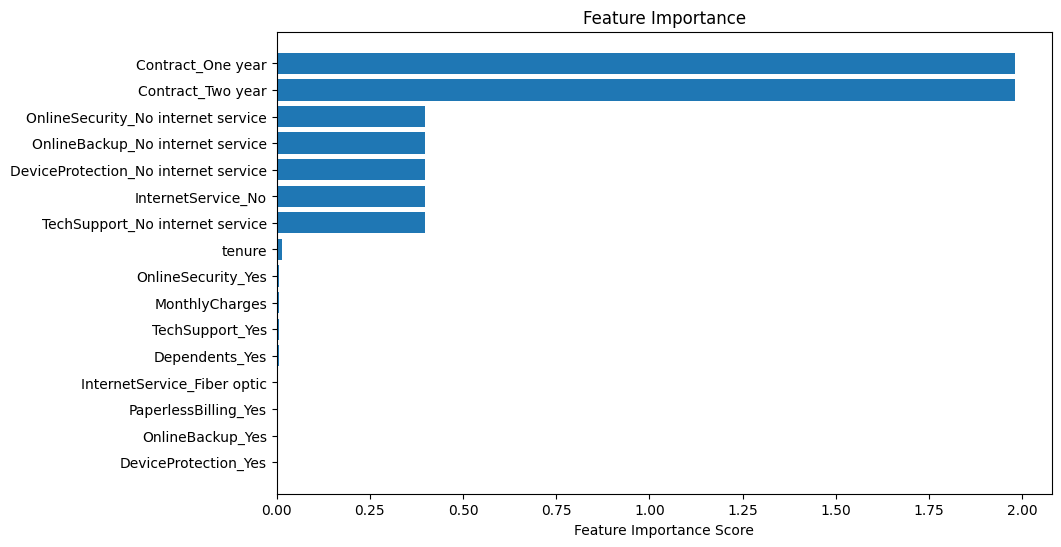

In [80]:
# Features Importance
one_hot_encoded_features = transform.named_transformers_['One Hot Encoder'].get_feature_names_out(input_features=['Dependents', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'InternetService', 'TechSupport', 'Contract', 'PaperlessBilling'])

scaled_features = ['tenure', 'MonthlyCharges']

all_features = list(one_hot_encoded_features) + scaled_features

best_model.fit(Xtrain, ytrain)

svc_model = best_model.named_steps['algo']
feature_importance = np.abs(svc_model.coef_).flatten()

features = list(one_hot_encoded_features) + scaled_features

feature_importance_list = list(zip(features, feature_importance))

feature_importance_list.sort(key=lambda x: x[1], reverse=True)

sorted_features, sorted_importance = zip(*feature_importance_list)

# plot
plt.figure(figsize=(10, 6))
plt.barh(sorted_features, sorted_importance)
plt.xlabel('Feature Importance Score')
plt.title('Feature Importance')
plt.gca().invert_yaxis()
plt.show()




Terlihat bahwa untuk model SVC-RUS, fitur `Contract_One year` dan `Contract_Two year` adalah yang **paling penting dalam memprediksi perilaku churn pelanggan**. Ini menunjukkan bahwa jenis kontrak yang dipilih oleh pelanggan memiliki dampak yang signifikan pada kecenderungan untuk berhenti berlangganan layanan. Fitur-fitur ini mungkin berkaitan dengan kontrak jangka panjang yang lebih mengikat, di mana pelanggan mungkin cenderung tetap setia kepada perusahaan. 

## **Conclusion & Recommendation**
---

## **Conclusion**

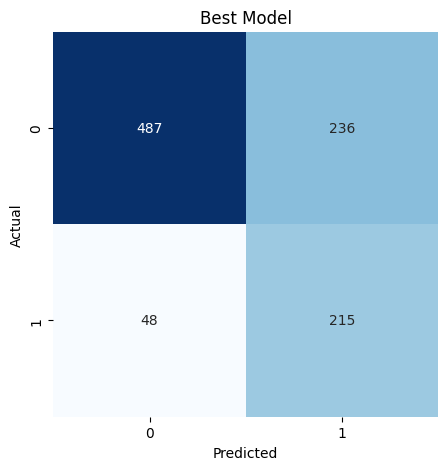

In [67]:
# Create Confussion Matrix
from sklearn.metrics import confusion_matrix

# Calculate the confusion matrices for each model
cm_ada = confusion_matrix(ytest, svcpred)
fig= plt.subplots(figsize=(15, 5))

# Plot the confusion matrix for Best Model
sns.heatmap(cm_ada, annot=True, fmt='g', cmap='Blues', cbar=False, square=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Best Model')

plt.show()

In [70]:
# Classification Report
y_pred = best_model.predict(Xtest)

report = classification_report(ytest, y_pred)

print('Classification Report Tuned SVC-RUS : \n', report)



Classification Report Tuned SVC-RUS : 
               precision    recall  f1-score   support

           0       0.91      0.67      0.77       723
           1       0.48      0.82      0.60       263

    accuracy                           0.71       986
   macro avg       0.69      0.75      0.69       986
weighted avg       0.79      0.71      0.73       986



**Confusion Matrix:**
- True Positive **(TP): 215 orang** -> Pelanggan yang sebenenarnya churn dan terpredikisi churn
- True Negative **(TN): 487 orang** -> Pelanggan yang sebenarnya tidak churn dan terprediksi tidak churn
- False Positive **(FP): 236 orang** -> Pelanggan yang sebenarnya tidak churn tapi terprediksi churn
- False Negative **(FN): 48 orang** -> Pelanggan yang sebenarnya churn tapi terprediksi tidak churn

Dalam konteks biaya dan penghematan, dapat dilakukan perhitungan sebagai berikut:

**Biaya Retensi per Pelanggan:**
- Biaya Retensi (Retention Cost) per pelanggan yang akan Churn (FP): Biaya Retensi per Pelanggan yang akan Churn dibagi jumlah False Positive (FP). 
  - Biaya Retensi per Pelanggan yang akan Churn = $11.04 / 236 = $0.0466 (sekitar $0.05 per pelanggan yang tidak akan churn)
- Biaya Retensi (Retention Cost) per pelanggan yang tidak akan Churn (TN): Biaya Retensi per Pelanggan yang tidak akan Churn dibagi jumlah True Negative (TN).
  - Biaya Retensi per Pelanggan yang tidak akan Churn = $11.74 / 487 = $0.0241 (sekitar $0.02 per pelanggan yang tidak akan churn)

**Biaya Akibat Kehilangan Pelanggan:**
- Biaya Akibat Kehilangan Pelanggan (False Negative - FN): Biaya Akibat Kehilangan Pelanggan per pelanggan yang akan Churn (FN).
  - Biaya Akibat Kehilangan Pelanggan = $521.00 / 48 = $10.85 (sekitar $10.85 per pelanggan yang akan churn)

**Perbandingan Biaya Sebelum dan Sesudah Menggunakan Model Machine Learning:**
- Biaya Total Sebelum Menggunakan Model (tanpa penggunaan model machine learning):
  - Total Biaya Akuisisi (Acquisition Cost) = 986 x $521 = $514,506
  - Total Biaya Retensi (Retention Cost) = ($0.0466 x 236) + ($0.0241 x 487) = $11.01 + $11.75 = $22.76
  - **Total Biaya Keseluruhan Sebelum** = $514,506 + $22.76 = **$514,528.76**

- Biaya Total Setelah Menggunakan Model (menggunakan model machine learning):
  - Total Biaya Akuisisi (Acquisition Cost) = 263 x $521 = $137,423
  - Total Biaya Retensi (Retention Cost) = ($0.0466 x 236) + ($0.0241 x 487) = $11.01 + $11.75 = $22.76
  - **Total Biaya Keseluruhan Setelah** = $137,423 + $22.76 = **$137,445.76**

**Perbandingan Penghematan:**
- Penghematan dengan Model = Biaya Total Sebelum - Biaya Total Setelah
- **Penghematan dengan Model** = $514,528.76 - $137,445.76 = **$377,083.00**

**Dengan menggunakan model machine learning, perusahaan dapat menghemat sekitar $377,083.00** dibandingkan tanpa model machine learning. Artinya, ada penghematan yang signifikan dalam biaya akuisisi dan retensi pelanggan.

Referensi: [Financial Post - Big telecoms are spending more cash to keep customers, but some tactics raise concerns](https://financialpost.com/technology/big-telecoms-are-spending-more-cash-to-keep-customers-but-some-tactics-raise-concerns)

## **Recommendation**

Ada beberapa poin yang kami rekomendasikan untuk kebaikan model dan tentu bisnisnya.

**1. Mengimplementasi Model yang Kami Berikan**:

Model SVC-RUS yang sudah dituning menunjukkan kinerja yang baik dalam mengidentifikasi pelanggan yang cenderung *churn*. Oleh karena itu, kami merekomendasikan untuk mengimplementasikan model ini dalam proses akuisisi dan retensi pelanggan. Terbukti terdapat penghematan yang signifikan dari penggunaan model machine learning.

**2. Penyesuaian Strategi Pemasaran**:

Dengan menggantikan pendekatan yang mengedepankan model ini, dapat dipertimbangkan penyesuaian strategi pemasaran perusahaan. Misalnya, dapat meningkatkan upaya retensi untuk pelanggan yang diprediksi akan *churn* atau mengoptimalkan alokasi anggaran pemasaran Anda untuk menghemat biaya.

**3. Fokus Pada Penawaran dan Promosi Opsi Kontrak Jangka Panjang ke Pelanggan**:

Kontrak satu dan dua tahun, menunjukkan  jenis kontrak yang dipilih oleh pelanggan yang memiliki kecenderungan untuk berhenti berlangganan layanan. Oleh karena itu, dalam upaya meningkatkan retensi pelanggan, Telco Systems dapat lebih fokus pada menawarkan dan mempromosikan opsi kontrak jangka panjang kepada pelanggan.

**4. Evaluasi Hasil Lebih Lanjut**:

Terus lakukan evaluasi hasil model dengan mengamati perubahan dalam metrik kinerja bisnis seperti *churn rate, customer lifetime value* (CLV), dan *revenue per customer*. Ini akan membantu perusahaan untuk memahami dampak juga dalam hal pengeluaran pendapatan perusahaan.